/var/folders/b0/m80gf4wx3pvdbp860pz1fqwc0000gn/T/ipykernel_57946/2962613169.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio = wav.read('Data/CTHS3_Acid_Bass_Loop_01_C_123.wav')


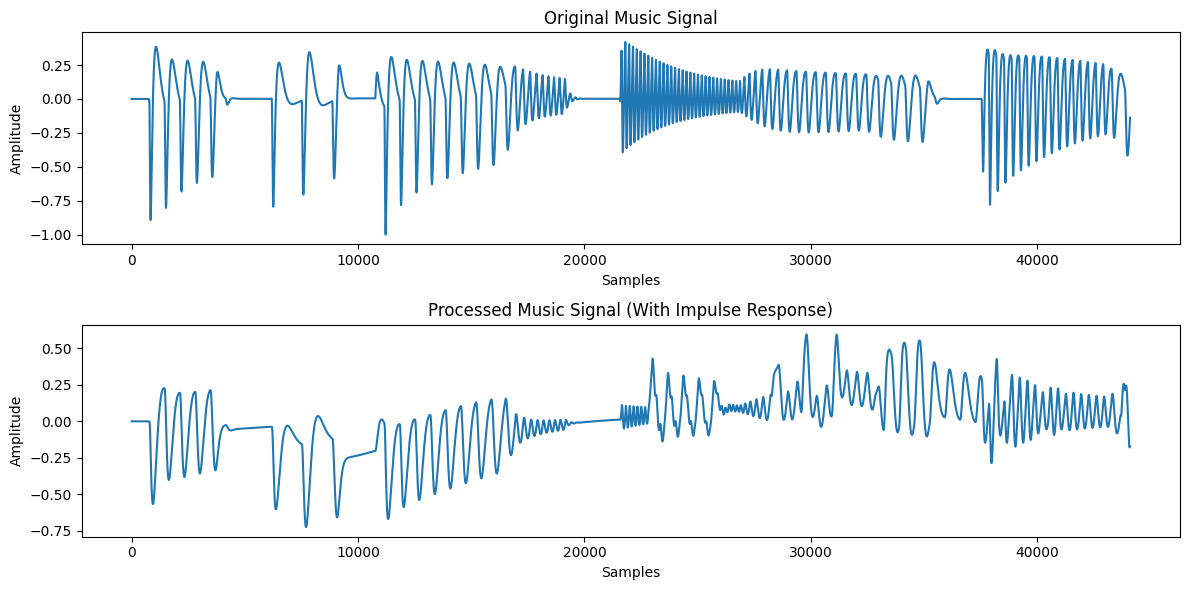

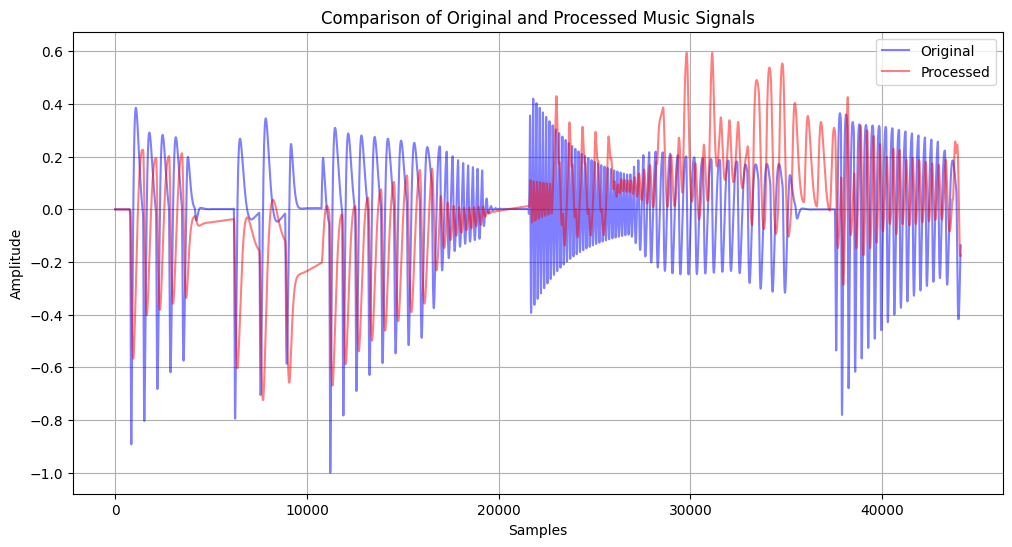

In [2]:
import numpy as np
import scipy.signal as signal
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

# Load an example audio file (replace 'audio.wav' with your file path)
sample_rate, audio = wav.read('Data/CTHS3_Acid_Bass_Loop_01_C_123.wav')

# If the audio is stereo, convert it to mono by averaging the channels (just for simplicity)
if len(audio.shape) > 1:
    audio = np.mean(audio, axis=1)

# Normalize audio to range [-1, 1] if it's not already
audio = audio / np.max(np.abs(audio))

# Create an example impulse response (e.g., a simple reverb effect)
# This is a basic exponentially decaying impulse response
decay = 0.5
impulse_response = np.exp(-np.linspace(0, 1, int(sample_rate * 0.5)) * decay)

# Convolve the audio signal with the impulse response
processed_audio = signal.convolve(audio, impulse_response, mode='full')

# Normalize the processed audio to avoid clipping
processed_audio = processed_audio / np.max(np.abs(processed_audio))

# Save the processed audio to a new file
wav.write('Output/music_reverb.wav', sample_rate, (processed_audio * 32767).astype(np.int16))

# Plot the original and processed audio signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title("Original Music Signal")
plt.plot(audio[:sample_rate])  # Plot 1 second of audio
plt.xlabel("Samples")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.title("Processed Music Signal (With Impulse Response)")
plt.plot(processed_audio[:sample_rate])  # Plot 1 second of processed audio
plt.xlabel("Samples")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

# Show both waveforms in a single plot using different colors
plt.figure(figsize=(12, 6))
plt.plot(audio[:sample_rate], label='Original', color='blue', alpha=0.5)
plt.plot(processed_audio[:sample_rate], label='Processed', color='red', alpha=0.5)  
plt.title("Comparison of Original and Processed Music Signals")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

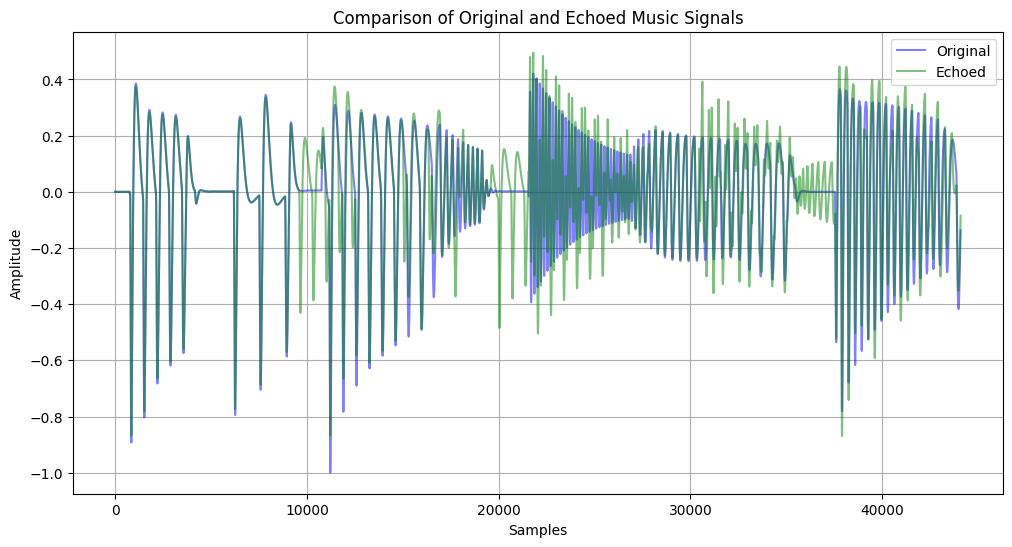

In [3]:
# Add echo to the original music signal
def add_echo(signal, delay, decay):
    # Create an echo effect by delaying the signal and applying decay
    echo_signal = np.zeros(len(signal) + delay)
    echo_signal[delay:] = signal * decay
    return signal + echo_signal[:len(signal)]
# Add echo to the processed audio
echoed_audio = add_echo(audio, int(sample_rate * 0.2), 0.5)
# Normalize the echoed audio to avoid clipping  
echoed_audio = echoed_audio / np.max(np.abs(echoed_audio))
# Save the echoed audio to a new file
wav.write('Output/music_echo.wav', sample_rate, (echoed_audio * 32767).astype(np.int16))
# Plot the original and echoed audio signals in one plot with different colors
plt.figure(figsize=(12, 6))
plt.plot(audio[:sample_rate], label='Original', color='blue', alpha=0.5)
plt.plot(echoed_audio[:sample_rate], label='Echoed', color='green', alpha=0.5)
plt.title("Comparison of Original and Echoed Music Signals")
plt.xlabel("Samples")   
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()